<a href="https://colab.research.google.com/github/mido-Jr/Regression_Model_Selection/blob/main/Regression_Model_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


> Hello, I will try to implement the most popular regression models


## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
from google.colab import files
files.upload() 

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets download -d gova26/airpressure --unzip

Saving kaggle.json to kaggle (1).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists
  0% 0.00/116k [00:00<?, ?B/s]
100% 116k/116k [00:00<00:00, 8.57MB/s]


In [ ]:
dataset = pd.read_csv('/content/Folds5x2_pp.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Polynomial Regression model

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
Polynomial_Regression = LinearRegression()
Polynomial_Regression.fit(X_poly, y_train)
y_pred_poly = Polynomial_Regression.predict(poly_reg.transform(X_test))

## Multiple Linear model

In [ ]:
from sklearn.linear_model import LinearRegression
Multiple_Linear = LinearRegression()
Multiple_Linear.fit(X_train, y_train)
y_pred_multi= Multiple_Linear.predict(X_test)

## Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor(random_state = 0)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

## Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
Random_Forest = RandomForestRegressor(n_estimators = 10, random_state = 0)
Random_Forest.fit(X_train, y_train)
y_pred_random = Random_Forest.predict(X_test)


## Support Vector Regression (SVR)

In [ ]:
y_svr = y.reshape(len(y),1)
X_svr = X

from sklearn.model_selection import train_test_split
X_train_svr, X_test_svr, y_train_svr, y_test_svr = train_test_split(X_svr, y_svr, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_svr = sc_X.fit_transform(X_train_svr)
y_train_svr = sc_y.fit_transform(y_train_svr)

from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train_svr, y_train_svr)

y_pred_svr = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test_svr)).reshape(len(X_test_svr),1))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Evaluating the Models Performance

In [ ]:
from sklearn.metrics import r2_score
multi = r2_score(y_test, y_pred_multi)
poly = r2_score(y_test, y_pred_poly)
random = r2_score(y_test, y_pred_random)
tree = r2_score(y_test, y_pred_tree)
svr = r2_score(y_test_svr, y_pred_svr)

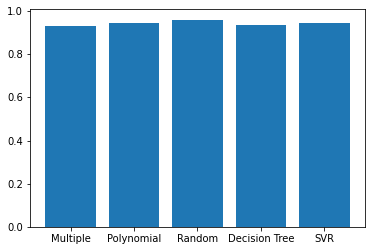

In [ ]:

Models = ['Multiple', 'Polynomial', 'Random', 'Decision Tree', 'SVR']
Score = [multi,poly,random,tree,svr]
plt.bar(Models,Score)
plt.show()

In [ ]:
max(Score)

0.9600247281286117